In [1]:
import pathlib

import seaborn as sns
import pandas as pd
import mne
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
path = pathlib.Path("/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/")  # openneuro

In [3]:
dirs = [obj for obj in path.iterdir() if obj.is_dir() and "sub-" in obj.name]
files = [obj for obj in path.iterdir() if not obj.is_dir()]
dirs[:3], files[:3]

([PosixPath('/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/sub-50'),
  PosixPath('/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/sub-40'),
  PosixPath('/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/sub-45')],
 [PosixPath('/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/CHANGES'),
  PosixPath('/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/dataset_description.json'),
  PosixPath('/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/.gitattributes')])

In [4]:
sub_50_scans = list(dirs[0].iterdir())[0]
sub_50_scans

PosixPath('/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/sub-50/sub-50_scans.tsv')

In [5]:
pd.read_csv(sub_50_scans, delimiter="\t")

,filename,acq_time
0,eeg/sub-50_task-oa_eeg.edf,2017-11-14T11:33:23.000000Z
1,eeg/sub-50_task-oc_eeg.edf,2017-11-14T11:25:22.000000Z


In [6]:
content = mne.io.read_raw_edf("/home/fdamicel/projects/pycourse/data/data-2/ds005420-download/sub-2/eeg/sub-2_task-oa_eeg.edf")
data = content.get_data()

Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/data-2/ds005420-download/sub-2/eeg/sub-2_task-oa_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [7]:
chan = pd.DataFrame(data.T, columns=content.ch_names)
chan.head()

,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,EEG C4-A1A2,EEG T3-A1A2,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC
0,-0.000007,-0.000009,-0.000009,-0.000006,-0.000009,-0.000021,-0.000009,-0.000008,-0.000004,-0.000006,1.681965e-06,-8.846591e-06,-9.120266e-07,0.000002,-2.132729e-06,0.000003,-0.000019,-1.980141e-06,-0.000004,0.000009
1,-0.000007,-0.000008,-0.000009,-0.000005,-0.000008,-0.000024,-0.000011,-0.000008,-0.000004,-0.000005,2.444904e-06,-3.353431e-06,6.138511e-07,0.000004,-6.068511e-07,0.000001,-0.000017,-9.120266e-07,-0.000004,0.000011
2,-0.000007,-0.000006,-0.000009,-0.000005,-0.000008,-0.000023,-0.000013,-0.000008,-0.000003,-0.000005,2.139729e-06,3.086755e-07,1.529378e-06,0.000004,7.664389e-07,-0.000002,-0.000012,3.500000e-09,-0.000004,0.000012
3,-0.000007,-0.000006,-0.000009,-0.000005,-0.000008,-0.000019,-0.000014,-0.000008,-0.000004,-0.000004,3.500000e-09,7.664389e-07,1.376790e-06,0.000002,1.071614e-06,-0.000006,-0.000007,-3.016755e-07,-0.000005,0.000013
4,-0.000007,-0.000008,-0.000010,-0.000007,-0.000009,-0.000011,-0.000015,-0.000009,-0.000006,-0.000005,-3.963782e-06,-2.437904e-06,3.500000e-09,-0.000001,3.086755e-07,-0.000010,-0.000002,-1.980141e-06,-0.000006,0.000013


In [8]:
chan.columns = [s.replace("EEG ", "") for s in chan.columns]
chan.head()

,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,C4-A1A2,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,-0.000007,-0.000009,-0.000009,-0.000006,-0.000009,-0.000021,-0.000009,-0.000008,-0.000004,-0.000006,1.681965e-06,-8.846591e-06,-9.120266e-07,0.000002,-2.132729e-06,0.000003,-0.000019,-1.980141e-06,-0.000004,0.000009
1,-0.000007,-0.000008,-0.000009,-0.000005,-0.000008,-0.000024,-0.000011,-0.000008,-0.000004,-0.000005,2.444904e-06,-3.353431e-06,6.138511e-07,0.000004,-6.068511e-07,0.000001,-0.000017,-9.120266e-07,-0.000004,0.000011
2,-0.000007,-0.000006,-0.000009,-0.000005,-0.000008,-0.000023,-0.000013,-0.000008,-0.000003,-0.000005,2.139729e-06,3.086755e-07,1.529378e-06,0.000004,7.664389e-07,-0.000002,-0.000012,3.500000e-09,-0.000004,0.000012
3,-0.000007,-0.000006,-0.000009,-0.000005,-0.000008,-0.000019,-0.000014,-0.000008,-0.000004,-0.000004,3.500000e-09,7.664389e-07,1.376790e-06,0.000002,1.071614e-06,-0.000006,-0.000007,-3.016755e-07,-0.000005,0.000013
4,-0.000007,-0.000008,-0.000010,-0.000007,-0.000009,-0.000011,-0.000015,-0.000009,-0.000006,-0.000005,-3.963782e-06,-2.437904e-06,3.500000e-09,-0.000001,3.086755e-07,-0.000010,-0.000002,-1.980141e-06,-0.000006,0.000013


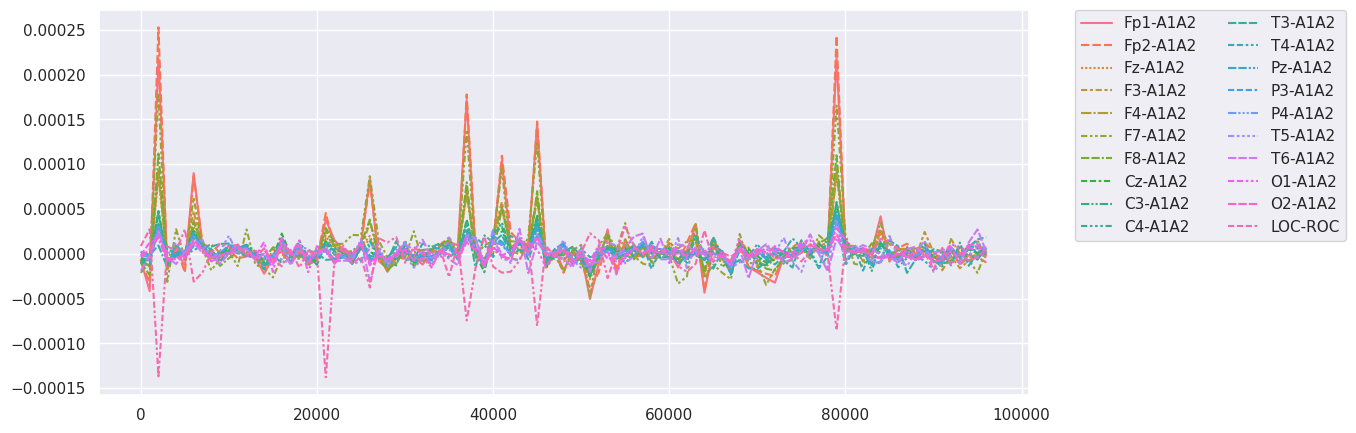

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(
    data=chan.iloc[::1000, :],
    ax=ax
)
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0, ncol=2)

## TODO
1) Get channels with name starting with "T" and "O"
2) Plot correlation matrix (eg heatmap)

In [10]:
selected_cols = []
for col in chan.columns:
    if col.startswith("0") or col.startswith("T"):
        selected_cols.append(col)

In [11]:
sub_df = chan[[c for c in chan.columns if c[0] in ("T", "O")]]
sub_df

,T3-A1A2,T4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2
0,1.681965e-06,-8.846591e-06,2.750080e-06,-0.000019,-1.980141e-06,-0.000004
1,2.444904e-06,-3.353431e-06,1.224202e-06,-0.000017,-9.120266e-07,-0.000004
2,2.139729e-06,3.086755e-07,-1.980141e-06,-0.000012,3.500000e-09,-0.000004
3,3.500000e-09,7.664389e-07,-6.252599e-06,-0.000007,-3.016755e-07,-0.000005
4,-3.963782e-06,-2.437904e-06,-9.914705e-06,-0.000002,-1.980141e-06,-0.000006
...,...,...,...,...,...,...
96995,6.717362e-06,-5.642248e-06,3.500000e-09,0.000002,-1.388199e-05,-0.000005
96996,3.207843e-06,1.755109e-05,1.816144e-05,-0.000001,-2.181655e-05,-0.000016
96997,-3.963782e-06,3.616680e-05,2.930035e-05,-0.000006,-1.510269e-05,-0.000022
96998,-1.067764e-05,3.769268e-05,2.502789e-05,-0.000008,5.038896e-06,-0.000016


<Axes: >

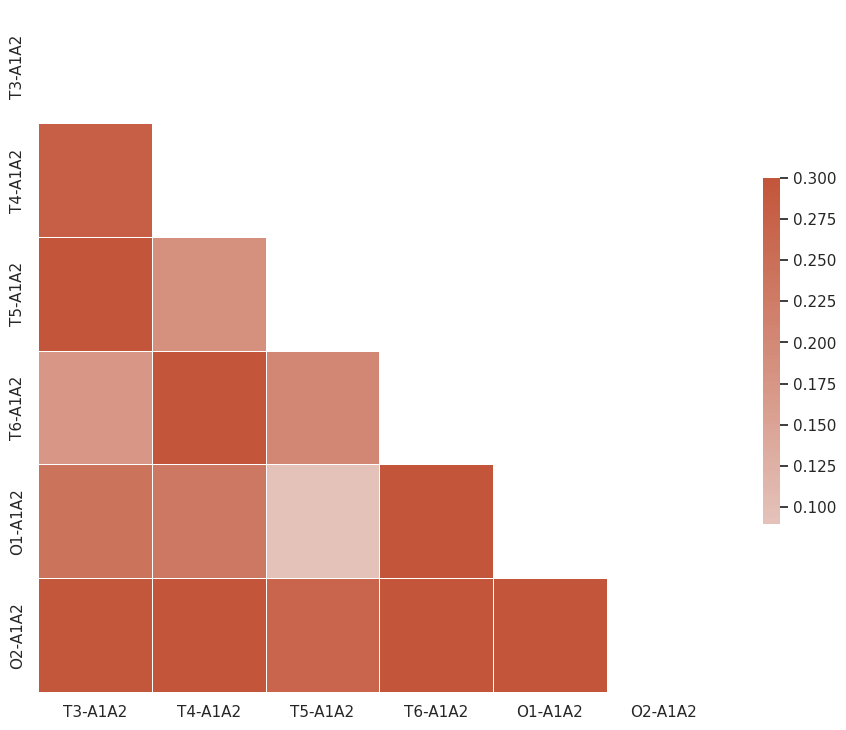

In [12]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = sub_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})